In [1]:
import os
os.chdir('../../')
!pwd

/root/python/myenv/medical-coding-reproducibility-main


In [ ]:
from src.settings import PALETTE, MODEL_NAMES
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('./files/retrieval/pseudo_relevance_feedback.csv')
# Replace model names with custom names
df['model'] = df['model'].replace(MODEL_NAMES)
df = df[(df['TopKSelection'] == 10) & (df['iteration'] < 6)]

In [3]:
df

,model,doc,psr,iteration,CosSim_Thresh,TopKSelection,f1_micro,f1_macro,exact_match_ratio,precision@8,precision@15,precision@recall,map,precision_micro,recall_micro,fpr_micro,auc_micro,auc_macro
0,CAML,10,1_0.1_0.0,0,0,10,55.1,15.6,0.3,66.5,51.9,54.2,57.0,58.1,52.4,0.1,98.5,90.7
1,CAML,10,1_0.1_0.0,1,0,10,55.1,15.8,0.3,66.6,52.0,54.3,57.1,57.2,53.2,0.1,98.5,90.7
2,CAML,10,1_0.1_0.0,2,0,10,55.1,15.9,0.3,66.6,52.0,54.3,56.9,56.4,53.9,0.1,98.5,90.7
3,CAML,10,1_0.1_0.0,3,0,10,55.0,15.9,0.3,66.4,51.9,54.3,56.7,55.5,54.6,0.1,98.4,90.7
4,CAML,10,1_0.1_0.0,4,0,10,54.9,16.0,0.3,66.2,51.8,54.1,56.4,54.6,55.2,0.1,98.4,90.7
5,CAML,10,1_0.1_0.0,5,0,10,54.6,16.1,0.3,65.9,51.7,54.0,56.0,53.6,55.7,0.1,98.4,90.6
22,LAAT,10,1_0.1_0.0,0,0,10,57.5,19.4,0.4,68.5,53.9,56.6,59.9,59.8,55.3,0.1,99.0,94.9
23,LAAT,10,1_0.1_0.0,1,0,10,57.5,19.5,0.4,68.7,54.0,56.7,60.1,59.0,56.1,0.1,99.0,94.9
24,LAAT,10,1_0.1_0.0,2,0,10,57.5,19.6,0.4,68.7,54.0,56.7,60.0,58.2,56.8,0.1,98.9,94.8
25,LAAT,10,1_0.1_0.0,3,0,10,57.4,19.7,0.4,68.5,54.0,56.7,59.7,57.4,57.4,0.1,98.9,94.8


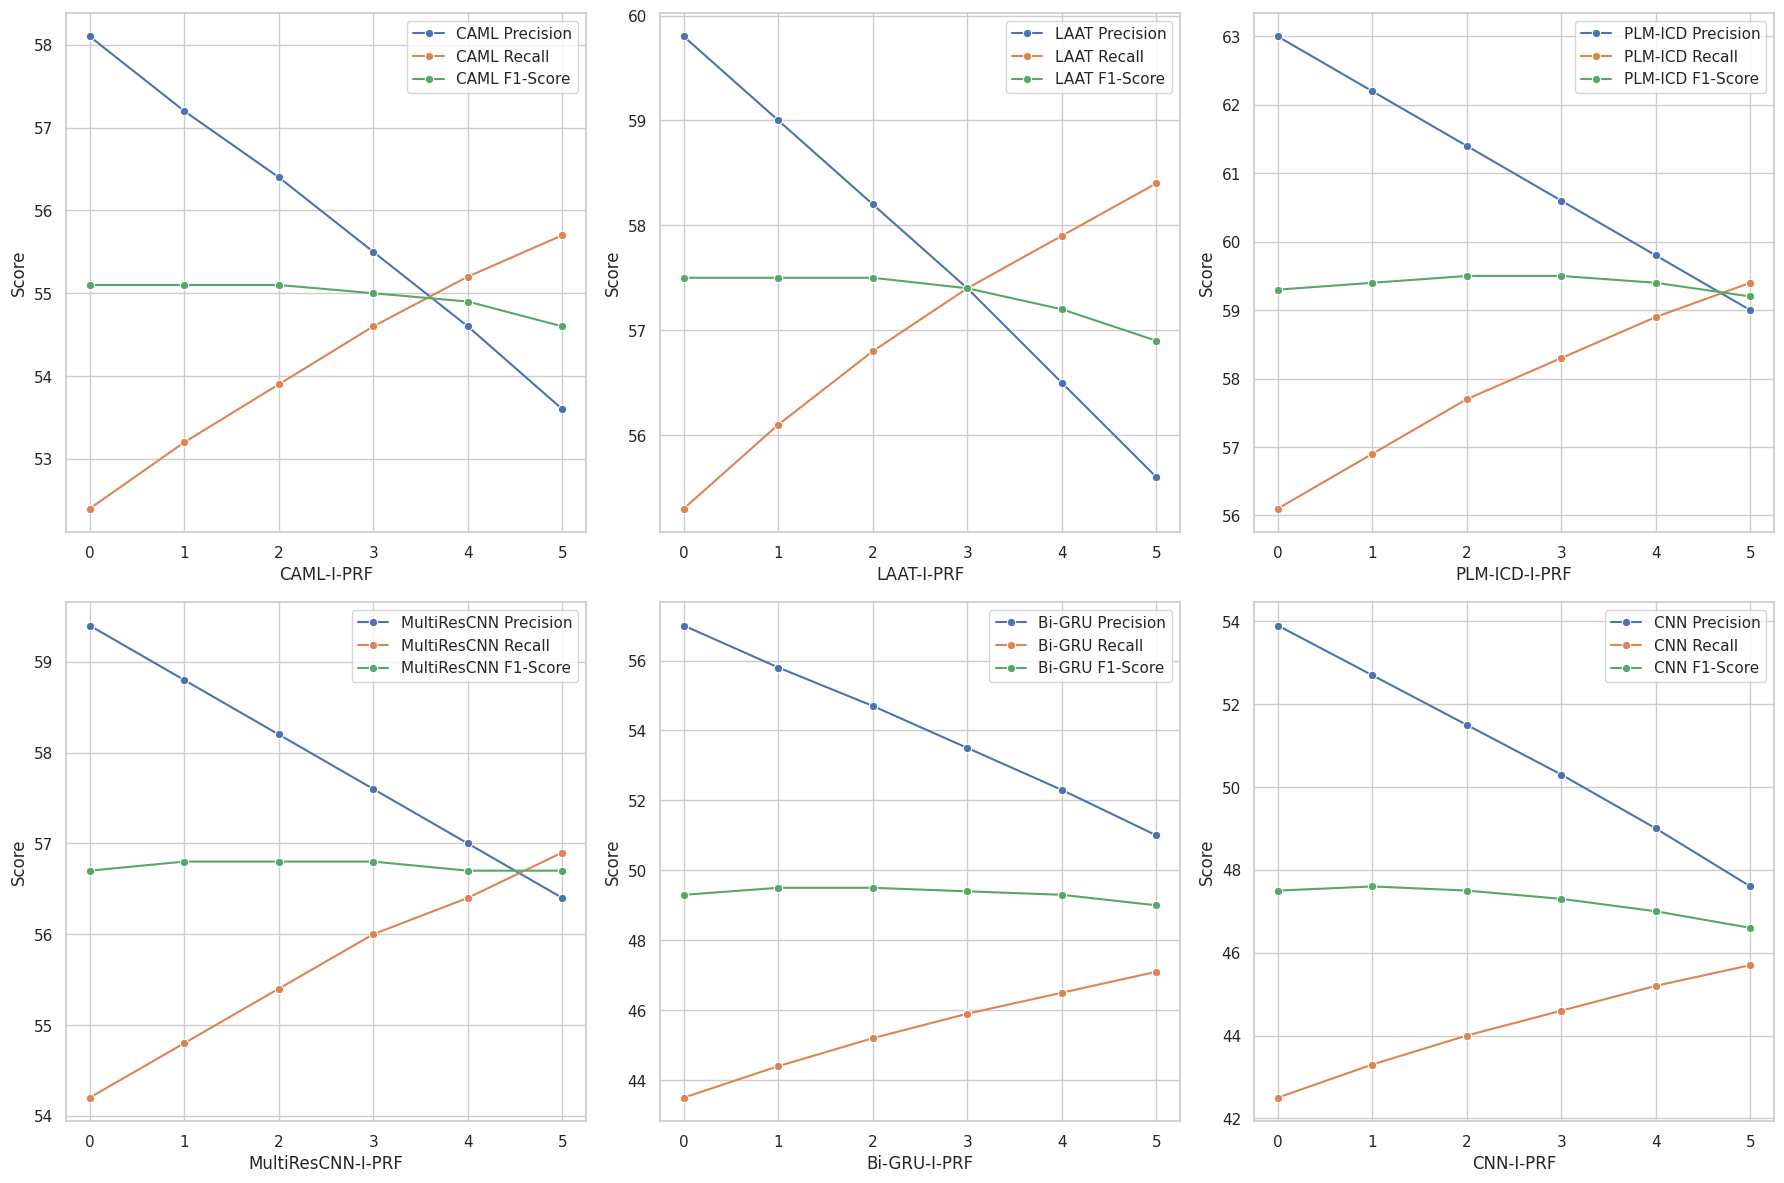

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data
recall = df['recall_micro'].tolist()
precision = df['precision_micro'].tolist()
f1micro = df['f1_micro'].tolist()
Iteration = df['iteration'].tolist()
model_names = df['model'].tolist()  # Assuming you have a column for model names

# Create a DataFrame for plotting
plot_data = {
    'I-PRF': Iteration,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1micro,
    'Model': model_names  # Add the model column
}

# Create a seaborn DataFrame
plot_df = pd.DataFrame(plot_data)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot for each model separately (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust to 2 rows, 3 columns

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop over unique models and plot each model's data on its respective subplot
for idx, model in enumerate(plot_df['Model'].unique()):
    if idx >= 6:  # Ensure we don't exceed the 2x3 grid
        break
    model_data = plot_df[plot_df['Model'] == model]
    ax = axes[idx]  # Get the subplot for the current model
    sns.lineplot(x='I-PRF', y='Precision', data=model_data, label=f'{model} Precision', marker='o', ax=ax)
    sns.lineplot(x='I-PRF', y='Recall', data=model_data, label=f'{model} Recall', marker='o', ax=ax)
    sns.lineplot(x='I-PRF', y='F1-Score', data=model_data, label=f'{model} F1-Score', marker='o', ax=ax)
    
    ax.set_xlabel(f'{model}-I-PRF')
    ax.set_ylabel('Score')
    ax.legend()

# Hide any unused subplots if there are fewer than 6 models
for idx in range(len(plot_df['Model'].unique()), 6):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()

# Save the image
plt.savefig('./files/retrieval/model_per_i5.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


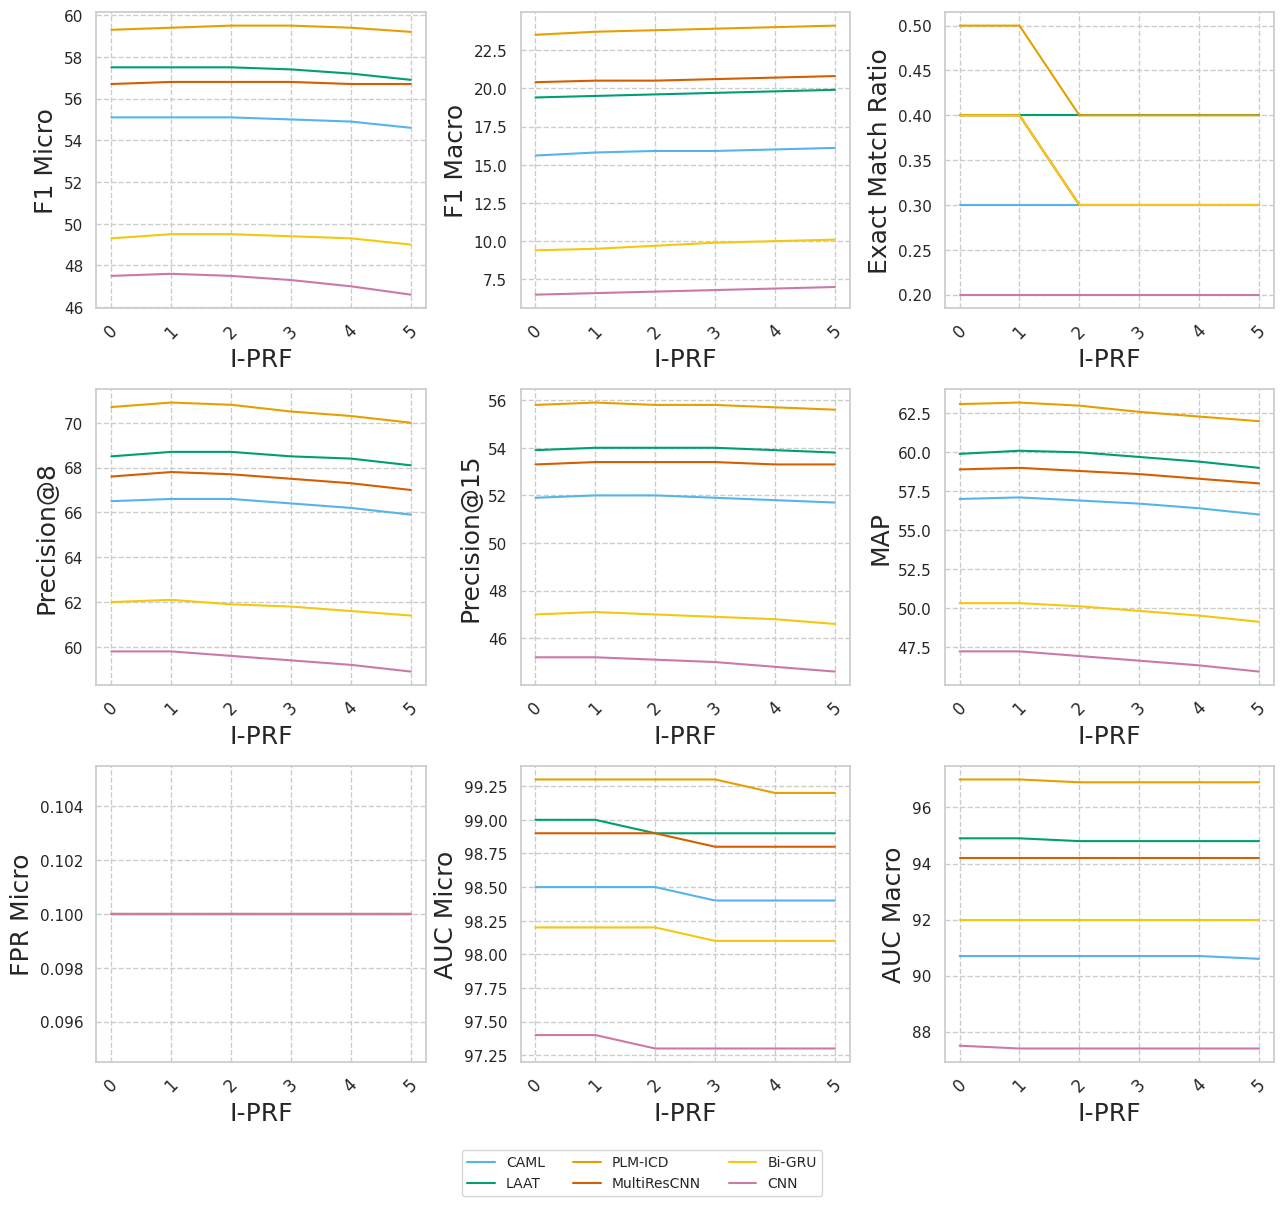

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the dataset has a (0, 0) point for each metric and model
metrics = ['f1_micro', 'f1_macro', 'exact_match_ratio', 'precision@8', 'precision@15', 'map', 'fpr_micro', 'auc_micro', 'auc_macro']
models = df['model'].unique()  # Get the unique models in the dataset

# Titles based on the metric names
titles = ['F1 Micro', 'F1 Macro', 'Exact Match Ratio', 'Precision@8', 'Precision@15', 'MAP', 'FPR Micro', 'AUC Micro', 'AUC Macro']

# Create a figure with 3 columns and 3 rows of subplots
fig, axes = plt.subplots(3, 3, figsize=(13, 12))

# Add a single title at the top
#fig.suptitle('Effect of pseudo relevance feedback across iterations on PLM-ICD', fontsize=22, fontweight='bold')

# Desired x-axis tick positions (include 0)
x_ticks = range(0, 6)

# Loop through each metric and plot it in the corresponding subplot
for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 3, i % 3]  # Get the correct subplot (row, col)
    sns.lineplot(x='iteration', y=metric, hue='model', data=df, palette=PALETTE, ax=ax)

    # Customize plot
    ax.set_xlabel('I-PRF', fontsize=18)
    ax.set_ylabel(title, fontsize=18)

    # Add gridlines
    ax.grid(True, axis='both', linestyle='--', linewidth=1)

    # Set x-axis ticks and labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks, rotation=45, fontsize=12)

# Save the image
plt.savefig('./files/retrieval/score_per_i5.png', dpi=300, bbox_inches='tight')

# Create a shared legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()  # Get legend from the first subplot
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)

# Remove legends from individual subplots
for ax in axes.flat:
    ax.legend_.remove()

# Adjust layout to make it look clean
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with suptitle
plt.show()
